# Loading required libraries

In [1]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.7 MB/s eta 0:00:00


In [2]:
# Loading primary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models

## Importing the data

In [3]:
df_hbf = pd.read_csv("Dataset 4 - HBF.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory analysis

In [4]:
df_hbf.info() # Checking for any missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7024 entries, 0 to 7023
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7024 non-null   int64 
 1   created_at  7024 non-null   object
 2   date        7024 non-null   object
 3   time        7024 non-null   object
 4   username    7024 non-null   object
 5   name        7024 non-null   object
 6   tweet       7024 non-null   object
 7   language    7024 non-null   object
 8   hashtags    7024 non-null   object
dtypes: int64(1), object(8)
memory usage: 494.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df_hbf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,created_at,date,time,username,name,tweet,language,hashtags
0,1517716413657808896,2022-04-23 04:06:05+00:00,2022-04-23,04:06:05,sintaprice,sintaprice,Thank you for great customer service at @hbfhe...,en,['prettyplease']
1,1517493151946067968,2022-04-22 13:18:55+00:00,2022-04-22,13:18:55,dalegobbey1,dalegobbey,@hbfhealth Ok,und,[]
2,1517493113018732545,2022-04-22 13:18:46+00:00,2022-04-22,13:18:46,dalegobbey1,dalegobbey,@hbfhealth Nice,en,[]
3,1516992119084400641,2022-04-21 04:08:00+00:00,2022-04-21,04:08:00,hbfhealth,HBF,"@DavidEl52539294 Hi David, thank you for reach...",en,[]
4,1516954774884986880,2022-04-21 01:39:36+00:00,2022-04-21,01:39:36,michellesndz,Michellers,How cute is this ad! Adorable! Clever lyrics! ...,en,"['lyrics', 'hbfhealth', 'hpf', 'cuteads', 'ani..."
...,...,...,...,...,...,...,...,...,...
7019,39547932810285056,2011-02-21 04:52:16+00:00,2011-02-21,04:52:16,hbfhealth,HBF,"@DamoMK Hey Damo, unfortunately we can't do th...",en,[]
7020,39542557314785280,2011-02-21 04:30:54+00:00,2011-02-21,04:30:54,hbfhealth,HBF,@ashulz @nic_clement Thanks guys! It's great t...,en,[]
7021,39538964746608640,2011-02-21 04:16:38+00:00,2011-02-21,04:16:38,hbfhealth,HBF,Did you happen to see our new ad for HBF Essen...,en,[]
7022,39531904428548096,2011-02-21 03:48:35+00:00,2011-02-21,03:48:35,hbfhealth,HBF,The HBF Freeway Bike Hike for Asthma is on Sun...,en,[]


In [6]:
df_hbf.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
       'language', 'hashtags'],
      dtype='object')

In [7]:
df_hbf = df_hbf[['date', 'time','username', 'tweet','language']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df_hbf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language
0,2022-04-23,04:06:05,sintaprice,Thank you for great customer service at @hbfhe...,en
1,2022-04-22,13:18:55,dalegobbey1,@hbfhealth Ok,und
2,2022-04-22,13:18:46,dalegobbey1,@hbfhealth Nice,en
3,2022-04-21,04:08:00,hbfhealth,"@DavidEl52539294 Hi David, thank you for reach...",en
4,2022-04-21,01:39:36,michellesndz,How cute is this ad! Adorable! Clever lyrics! ...,en


# Preprocessing

## Transforming to lower cases

In [9]:
import pandas as pd

#### Checking for Mixed Case in Interested Columns

def has_both_cases(column):
    for value in column:
        if any(char.islower() for char in value) and any(char.isupper() for char in value):
            return True
    return False

print('username')
if has_both_cases(df_hbf['username']):
    print("The column contains both upper and lower case characters.")
else:
    print("The column does not contain both upper and lower case characters.")

print('tweet')
if has_both_cases(df_hbf['tweet']):
    print("The column contains both upper and lower case characters.")
else:
    print("The column does not contain both upper and lower case characters.")

print('language')
if has_both_cases(df_hbf['language']):
    print("The column contains both upper and lower case characters.")
else:
    print("The column does not contain both upper and lower case characters.")

username
The column does not contain both upper and lower case characters.
tweet
The column contains both upper and lower case characters.
language
The column does not contain both upper and lower case characters.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Transform sentences into lowercase
df_hbf['tweet'] = df_hbf['tweet'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-a42c4abea511>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbf['tweet'] = df_hbf['tweet'].str.lower()


In [11]:
df_hbf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language
0,2022-04-23,04:06:05,sintaprice,thank you for great customer service at @hbfhe...,en
1,2022-04-22,13:18:55,dalegobbey1,@hbfhealth ok,und
2,2022-04-22,13:18:46,dalegobbey1,@hbfhealth nice,en
3,2022-04-21,04:08:00,hbfhealth,"@davidel52539294 hi david, thank you for reach...",en
4,2022-04-21,01:39:36,michellesndz,how cute is this ad! adorable! clever lyrics! ...,en


## Removing twitter IDs

In [12]:
def remove_twitter_ids(tweet):
  mention_removed_tweet = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet)) # remove any sequence of characters followed by '@' sign
  spaces_removed = re.sub(r"\s\s+", " ", str(mention_removed_tweet)) # remove multiple spaces
  return spaces_removed

df_hbf['tweet'] = df_hbf['tweet'].apply(remove_twitter_ids)
df_hbf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-44c09ecd556b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbf['tweet'] = df_hbf['tweet'].apply(remove_twitter_ids)


,date,time,username,tweet,language
0,2022-04-23,04:06:05,sintaprice,thank you for great customer service at just b...,en
1,2022-04-22,13:18:55,dalegobbey1,ok,und
2,2022-04-22,13:18:46,dalegobbey1,nice,en
3,2022-04-21,04:08:00,hbfhealth,hi david thank you for reaching out we can ce...,en
4,2022-04-21,01:39:36,michellesndz,how cute is this ad adorable clever lyrics lyr...,en


## Duplicate removal

In [13]:
# Check duplicate tweets count
duplicate_count = len(df_hbf['tweet'])-len(df_hbf['tweet'].drop_duplicates())
print('Duplicate count:', duplicate_count)
print('Total records before remove duplicates:', df_hbf.shape[0])

Duplicate count: 251
Total records before remove duplicates: 7024


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# drop duplicates (keep the last tweet of each of the duplicates)
df_hbf = df_hbf.drop_duplicates(subset='tweet', keep="first")
print('updated record count:', df_hbf.shape[0])

updated record count: 6773


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Removing punctuations

In [15]:
# Remove punctuations
df_hbf['tweet'] = df_hbf['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.
df_hbf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-fed16c24cd4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbf['tweet'] = df_hbf['tweet'].str.replace(r'[^\w\s]','')  # This is the use of regular expressions.


,date,time,username,tweet,language
0,2022-04-23,04:06:05,sintaprice,thank you for great customer service at just b...,en
1,2022-04-22,13:18:55,dalegobbey1,ok,und
2,2022-04-22,13:18:46,dalegobbey1,nice,en
3,2022-04-21,04:08:00,hbfhealth,hi david thank you for reaching out we can ce...,en
4,2022-04-21,01:39:36,michellesndz,how cute is this ad adorable clever lyrics lyr...,en


## Stop words and domain related word removal

In [16]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
unique_values = df_hbf['language'].unique() #finding unique languages

print(unique_values)

['en' 'und' 'es' 'it' 'pt' 'cy' 'tl' 'et' 'is' 'in' 'ro' 'nl' 'de' 'zh'
 'hi']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# get the list of all stopwords from the library
stop = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
stop.remove('not')
# The term 'not' in the stop word list can negatively impact sentiment analysis.
# Words like 'not' are crucial for capturing negation and sentiment reversal. Therefore we should not include "not" in the stop word list here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Remove the words in 'stop' list
def remove_stop_words(post):
  tokens = post.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

df_hbf['tweet'] = df_hbf['tweet'].apply(remove_stop_words)
df_hbf.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language
0,2022-04-23,04:06:05,sintaprice,thank great customer service bought new policy...,en
1,2022-04-22,13:18:55,dalegobbey1,ok,und
2,2022-04-22,13:18:46,dalegobbey1,nice,en
3,2022-04-21,04:08:00,hbfhealth,hi david thank reaching certainly understand c...,en
4,2022-04-21,01:39:36,michellesndz,cute ad adorable clever lyrics lyrics hbfhealt...,en


## Removing digits

In [22]:
def remove_digits(sent): #For a sentiment analytics task, numbers or digits are not needed. Thus, we remove digits from the text dataset.
  return " ".join(w for w in sent.split() if not w.isdigit())

df_hbf['tweet'] = df_hbf['tweet'].apply(remove_digits)
df_hbf.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language
0,2022-04-23,04:06:05,sintaprice,thank great customer service bought new policy...,en
1,2022-04-22,13:18:55,dalegobbey1,ok,und
2,2022-04-22,13:18:46,dalegobbey1,nice,en
3,2022-04-21,04:08:00,hbfhealth,hi david thank reaching certainly understand c...,en
4,2022-04-21,01:39:36,michellesndz,cute ad adorable clever lyrics lyrics hbfhealt...,en


## Standardization of tweets

### Stemming

In [23]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df_hbf['tweet_stem'] = df_hbf['tweet'].apply(stemming_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Lemmatization


In [24]:
# Download wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def lemmatize_function(sent):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df_hbf['tweet_lemmatized'] = df_hbf['tweet'].apply(lemmatize_function)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Compare the content vs. stemmed content
df_hbf[['tweet', 'tweet_stem','tweet_lemmatized' ]].tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet,tweet_stem,tweet_lemmatized
7014,thoughts everyone christchurch nz u r hbf trav...,thought everyon christchurch nz u r hbf travel...,thought everyone christchurch nz u r hbf trave...
7015,keep date travel advice oz govt smartraveller ...,keep date travel advic oz govt smartravel esp ...,keep date travel advice oz govt smartraveller ...
7016,hopes everyone safe perth cbd,hope everyon safe perth cbd,hope everyone safe perth cbd
7017,need tips eating well improve health checkout ...,need tip eat well improv health checkout dieti...,need tip eating well improve health checkout d...
7018,clement cheers rob,clement cheer rob,clement cheer rob
7019,hey damo unfortunately cant online yet em soci...,hey damo unfortun cant onlin yet em socialcoma...,hey damo unfortunately cant online yet em soci...
7020,clement thanks guys great nic,clement thank guy great nic,clement thanks guy great nic
7021,happen see new ad hbf essentials yesterday not...,happen see new ad hbf essenti yesterday not ch...,happen see new ad hbf essential yesterday not ...
7022,hbf freeway bike hike asthma sun 20th march ra...,hbf freeway bike hike asthma sun 20th march ra...,hbf freeway bike hike asthma sun 20th march ra...
7023,perth84 hi amanda help please email socialcoma...,perth84 hi amanda help pleas email socialcomau...,perth84 hi amanda help please email socialcoma...


In [28]:
# Dropping stemming column
df_hbf.drop(columns=['tweet_stem'], inplace=True)
df_hbf.tail()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
7019,2011-02-21,04:52:16,hbfhealth,hey damo unfortunately cant online yet em soci...,en,hey damo unfortunately cant online yet em soci...
7020,2011-02-21,04:30:54,hbfhealth,clement thanks guys great nic,en,clement thanks guy great nic
7021,2011-02-21,04:16:38,hbfhealth,happen see new ad hbf essentials yesterday not...,en,happen see new ad hbf essential yesterday not ...
7022,2011-02-21,03:48:35,hbfhealth,hbf freeway bike hike asthma sun 20th march ra...,en,hbf freeway bike hike asthma sun 20th march ra...
7023,2011-02-21,03:27:52,hbfhealth,perth84 hi amanda help please email socialcoma...,en,perth84 hi amanda help please email socialcoma...


#Word frequency analysis

In [29]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_hbf['tweet_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Top 10 most frequently used words
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


u         1083
hbf        772
health     689
hi         674
amp        615
member     600
dm         528
lauren     521
get        521
not        484
Name: count, dtype: int64

In [31]:
# least common words
word_frequency[-10:]  # get top 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


paultayloreyewear    1
recovers             1
pearce               1
caption              1
nathans              1
longterm             1
sliced               1
impaired             1
backchat             1
perth84              1
Name: count, dtype: int64

In [32]:
# Filter rows where any column contains the letter ' u '
filtered_rows = df_hbf[df_hbf.apply(lambda row: row.astype(str).str.contains(' u ', case=False).any(), axis=1)]

filtered_rows.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
18,2022-04-16,01:35:18,freocookster,binging season alone feel charged animal cruel...,en,binging season alone feel charged animal cruel...
47,2022-03-30,00:11:09,hbfhealth,thank reaching us sorry hear experience hbf ce...,en,thank reaching u sorry hear experience hbf cer...
67,2022-03-15,02:56:45,hbfhealth,hi aileen im sorry hear youve experience call ...,en,hi aileen im sorry hear youve experience call ...
78,2022-03-08,05:57:22,hbfhealth,thank response confirm feedback recorded team ...,en,thank response confirm feedback recorded team ...
96,2022-02-23,05:30:34,hbfhealth,hi christine hope feel better soon would love ...,en,hi christine hope feel better soon would love ...


In [33]:
# Filter rows where any column contains the letter ' hi '
filtered_rows = df_hbf[df_hbf.apply(lambda row: row.astype(str).str.contains(' hi ', case=False).any(), axis=1)]

filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
22,2022-04-13,06:07:08,hbfhealth,kel hi hbf assessing impact changes would memb...,en,kel hi hbf assessing impact change would membe...
23,2022-04-13,06:03:52,hbfhealth,dumont hi kat thanks loyal thats amazing hear ...,en,dumont hi kat thanks loyal thats amazing hear ...
93,2022-02-23,12:11:33,fanging_it,healthcare hi christine somewhere internet ser...,en,healthcare hi christine somewhere internet ser...
110,2022-02-17,04:31:24,hbfhealth,damian hi damian paula thank reaching understa...,en,damian hi damian paula thank reaching understa...
153,2022-02-07,08:47:35,hbfhealth,birch hi jason able adjust lhc sight lhc lette...,en,birch hi jason able adjust lhc sight lhc lette...


In [34]:
# Filter rows where any column contains the letter ' dm '
filtered_rows = df_hbf[df_hbf.apply(lambda row: row.astype(str).str.contains(' dm ', case=False).any(), axis=1)]

filtered_rows.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
863,2020-07-09,02:18:05,hbfhealth,hi romz appreciate would like get tax return l...,en,hi romz appreciate would like get tax return l...
926,2020-04-23,01:28:21,hbfhealth,hi dani possible recommend obtaining benefit q...,en,hi dani possible recommend obtaining benefit q...
954,2020-04-14,00:50:31,hbfhealth,mike covid19 centres set within public hospita...,en,mike covid19 centre set within public hospital...
1035,2020-03-31,00:53:32,hbfhealth,havent paid benefits telehealth services given...,en,havent paid benefit telehealth service given c...
1052,2020-03-27,03:24:02,hbfhealth,au hi matt cancelled premium increase sent let...,en,au hi matt cancelled premium increase sent let...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-fe525b7e474d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8, palette=colors)


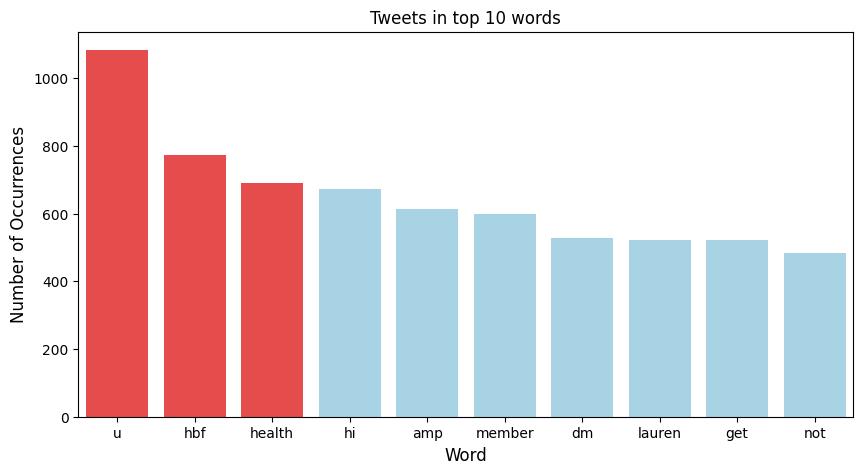

In [35]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

In [36]:
from PIL import Image
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


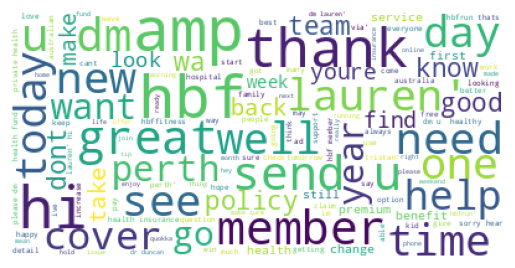

In [37]:
corpus = list(df_hbf['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##Removing common words

In [38]:
# Creating a list of custom stopwords
new_words_to_remove = ["u", "hbf", "year","hi","dm"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Remove common words
# We will use lambda function here.
df_hbf['tweet_lemmatized'] = df_hbf['tweet_lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df_hbf.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
0,2022-04-23,04:06:05,sintaprice,thank great customer service bought new policy...,en,thank great customer service bought new policy...
1,2022-04-22,13:18:55,dalegobbey1,ok,und,ok
2,2022-04-22,13:18:46,dalegobbey1,nice,en,nice
3,2022-04-21,04:08:00,hbfhealth,hi david thank reaching certainly understand c...,en,david thank reaching certainly understand conc...
4,2022-04-21,01:39:36,michellesndz,cute ad adorable clever lyrics lyrics hbfhealt...,en,cute ad adorable clever lyric lyric hbfhealth ...


In [40]:
# Create a word frequency series. (This is a pandas series)
word_frequency = pd.Series(' '.join(df_hbf['tweet_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# Look at the top 10 words (you can write either word_frequency[:10] or word_frequency[0:10]. Both give the same result.)
word_frequency[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


health    689
amp       615
member    600
lauren    521
get       521
not       484
thanks    478
help      429
great     425
well      344
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-42-fe525b7e474d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8, palette=colors)


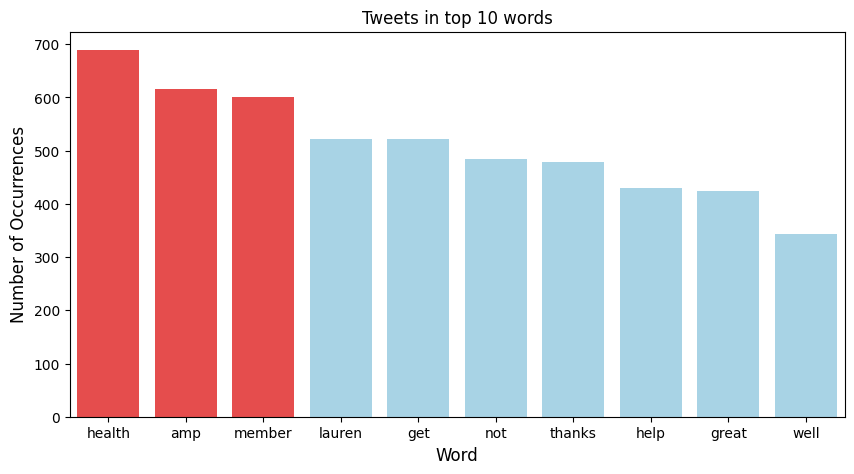

In [42]:
# Visualize the top word counts

word_count  = word_frequency
word_count = word_count[:10,]
colors = ['red' if i < 3 else 'skyblue' for i in range(len(word_count))]
plt.figure(figsize=(10,5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8, palette=colors)
plt.title('Tweets in top 10 words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


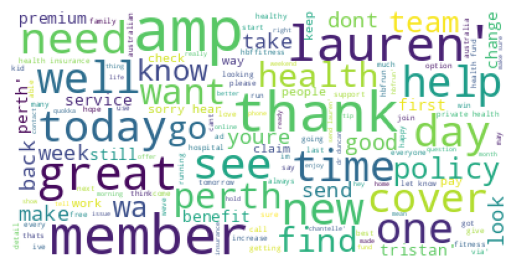

In [43]:
corpus = list(df_hbf['tweet_lemmatized'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Text Feature Extraction

### N-Grams

In [44]:
# Seperating tweets posted by customers and HBF it self.
df_hbf_comp = df_hbf.loc[df_hbf['username'] == 'hbfhealth']
df_hbf_cust = df_hbf.loc[df_hbf['username'] != 'hbfhealth']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
df_hbf_comp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
3,2022-04-21,04:08:00,hbfhealth,hi david thank reaching certainly understand c...,en,david thank reaching certainly understand conc...
20,2022-04-13,07:23:55,hbfhealth,kel thanks reply sorry hear feedback passed im...,en,kel thanks reply sorry hear feedback passed im...
22,2022-04-13,06:07:08,hbfhealth,kel hi hbf assessing impact changes would memb...,en,kel assessing impact change would member may a...
23,2022-04-13,06:03:52,hbfhealth,dumont hi kat thanks loyal thats amazing hear ...,en,dumont kat thanks loyal thats amazing hear alw...
33,2022-04-05,04:53:42,hbfhealth,sound good learn,en,sound good learn
...,...,...,...,...,...,...
7019,2011-02-21,04:52:16,hbfhealth,hey damo unfortunately cant online yet em soci...,en,hey damo unfortunately cant online yet em soci...
7020,2011-02-21,04:30:54,hbfhealth,clement thanks guys great nic,en,clement thanks guy great nic
7021,2011-02-21,04:16:38,hbfhealth,happen see new ad hbf essentials yesterday not...,en,happen see new ad essential yesterday not chec...
7022,2011-02-21,03:48:35,hbfhealth,hbf freeway bike hike asthma sun 20th march ra...,en,freeway bike hike asthma sun 20th march raisin...


In [46]:
df_hbf_cust.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
0,2022-04-23,04:06:05,sintaprice,thank great customer service bought new policy...,en,thank great customer service bought new policy...
1,2022-04-22,13:18:55,dalegobbey1,ok,und,ok
2,2022-04-22,13:18:46,dalegobbey1,nice,en,nice
4,2022-04-21,01:39:36,michellesndz,cute ad adorable clever lyrics lyrics hbfhealt...,en,cute ad adorable clever lyric lyric hbfhealth ...
5,2022-04-20,17:01:48,davidel52539294,im pensioner health cover cost increased chang...,en,im pensioner health cover cost increased chang...


In [47]:
# This function will generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):

    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0)

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### N-Grams for company tweets

In [48]:
# Create a word frequency series. (This is a pandas series)
word_frequency_comp = pd.Series(' '.join(df_hbf_comp['tweet_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
word_frequency_comp[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


lauren    495
member    474
amp       446
health    382
help      372
get       331
send      321
thanks    313
great     301
well      255
Name: count, dtype: int64

In [50]:
tri_grams_hbf_comp = get_ngrams(df_hbf_comp['tweet_lemmatized'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
tri_grams_hbf_comp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('free health check', 29),
 ('win sport fever', 22),
 ('branch free health', 22),
 ('record result pocket', 22),
 ('result pocket health', 22),
 ('health check member', 20),
 ('tristan amp lauren', 20),
 ('sport fever voucher', 20),
 ('kind regard steph', 18),
 ('happy help lauren', 17),
 ('rottnest channel swim', 17),
 ('member record result', 17),
 ('would like discus', 16),
 ('send member number', 16),
 ('send help lauren', 16),
 ('lauren amp tristan', 16),
 ('im sorry hear', 15),
 ('address well get', 14),
 ('go draw win', 14),
 ('check member record', 14),
 ('please member number', 13),
 ('sorry hear please', 12),
 ('best time call', 12),
 ('sorry hear youve', 11),
 ('make sure get', 11),
 ('please let know', 11),
 ('member number look', 11),
 ('thanks letting know', 11),
 ('im happy help', 11),
 ('keep posted progress', 11),
 ('dr duncan jefferson', 11),
 ('would love opportunity', 9),
 ('private health insurance', 9),
 ('let know lauren', 9),
 ('help send lauren', 9),
 ('win gr

In [52]:
bi_grams_hbf_comp = get_ngrams(df_hbf_comp['tweet_lemmatized'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
bi_grams_hbf_comp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('sorry hear', 114),
 ('let know', 72),
 ('send lauren', 62),
 ('would like', 61),
 ('dr duncan', 61),
 ('make sure', 56),
 ('member number', 56),
 ('help lauren', 54),
 ('happy help', 48),
 ('great hear', 46),
 ('free health', 39),
 ('health check', 37),
 ('would love', 36),
 ('give call', 35),
 ('health insurance', 34),
 ('please call', 33),
 ('well get', 32),
 ('good luck', 32),
 ('chance win', 31),
 ('well done', 31),
 ('thanks feedback', 31),
 ('feel free', 30),
 ('health fund', 30),
 ('tristan amp', 30),
 ('pocket health', 29),
 ('premium increase', 28),
 ('sound like', 28),
 ('wed love', 28),
 ('health member', 27),
 ('member get', 27),
 ('outdoor fitness', 26),
 ('kind regard', 26),
 ('chat lauren', 24),
 ('email socialcomau', 24),
 ('sport fever', 24),
 ('send help', 23),
 ('howd like', 23),
 ('address well', 23),
 ('need help', 22),
 ('thanks much', 22),
 ('regard steph', 22),
 ('win sport', 22),
 ('branch free', 22),
 ('record result', 22),
 ('result pocket', 22),
 ('check 

In [54]:
bi_grams_hbf_comp_df = pd.DataFrame(bi_grams_hbf_comp)
bi_grams_hbf_comp_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-55-41c1858e4ae9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h = sns.barplot(x="Bi-gram", y="Freq", data=bi_grams_hbf_comp_df[:top_bigrams_to_show], palette=palette_colors)
<ipython-input-55-41c1858e4ae9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)


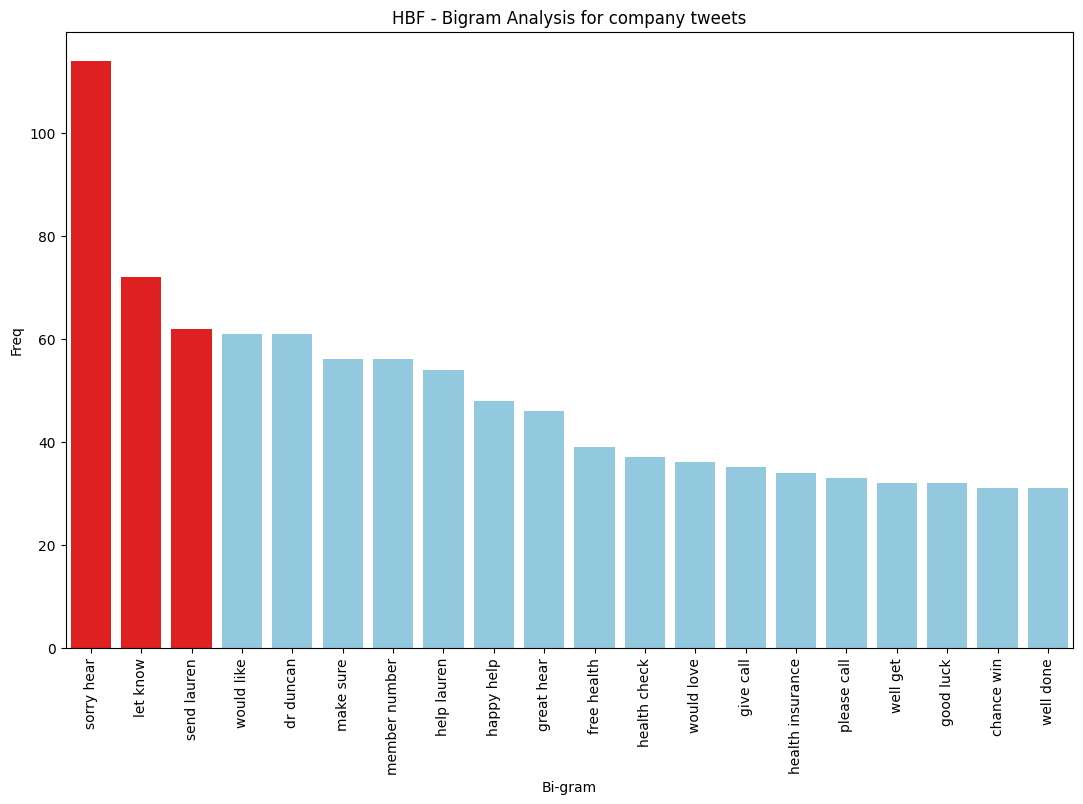

In [55]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

plt.figure(figsize=(13, 8))
palette_colors = ['red' if i < 3 else 'skyblue' for i in range(top_bigrams_to_show)]
h = sns.barplot(x="Bi-gram", y="Freq", data=bi_grams_hbf_comp_df[:top_bigrams_to_show], palette=palette_colors)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('HBF - Bigram Analysis for company tweets')
plt.show()


In [56]:
tri_grams_hbf_comp_df = pd.DataFrame(tri_grams_hbf_comp)
tri_grams_hbf_comp_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-57-531c55860c22>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h = sns.barplot(x="Tri-gram", y="Freq", data=tri_grams_hbf_comp_df[:top_bigrams_to_show], palette=palette_colors)
<ipython-input-57-531c55860c22>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)


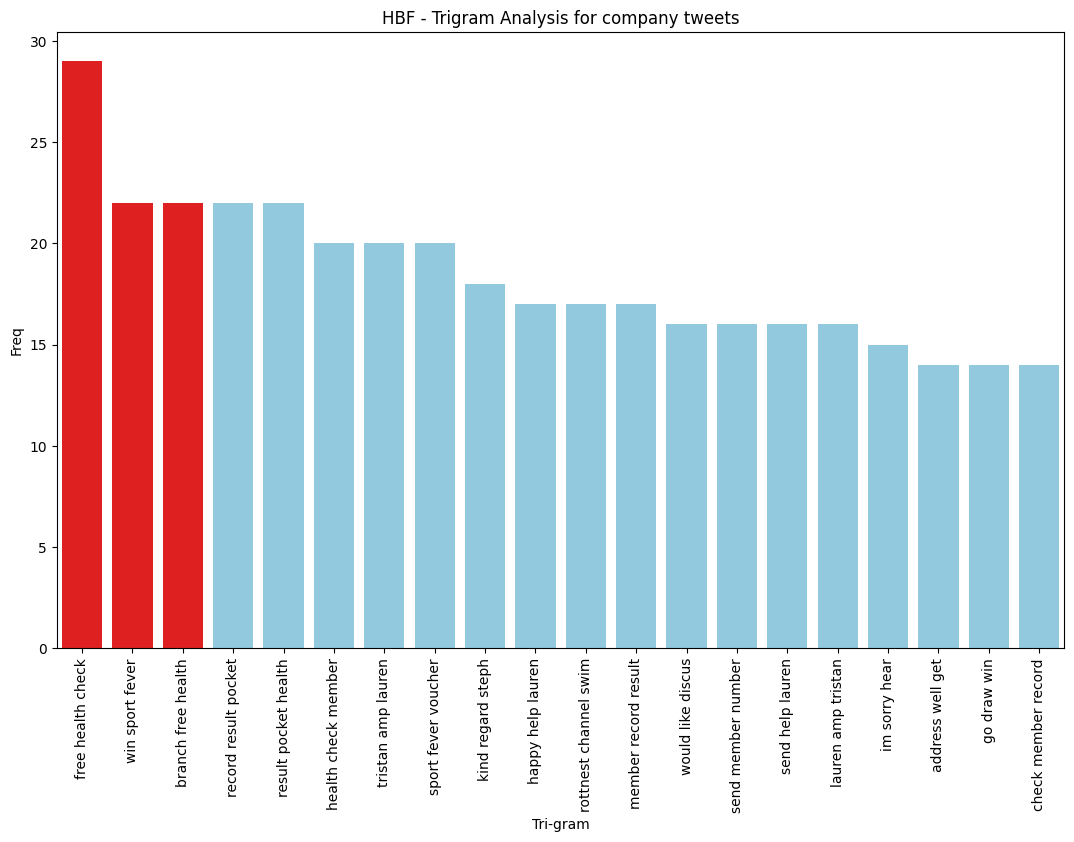

In [57]:
# Barplot of most freq Tri-grams
top_bigrams_to_show = 20

plt.figure(figsize=(13, 8))
palette_colors = ['red' if i < 3 else 'skyblue' for i in range(top_bigrams_to_show)]
h = sns.barplot(x="Tri-gram", y="Freq", data=tri_grams_hbf_comp_df[:top_bigrams_to_show], palette=palette_colors)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('HBF - Trigram Analysis for company tweets')
plt.show()

#### N-Grams for customer tweets

In [58]:
# Create a word frequency series. (This is a pandas series)
word_frequency_cust = pd.Series(' '.join(df_hbf_cust['tweet_lemmatized']).split()).value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
word_frequency_cust[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


health       307
not          253
get          190
amp          169
insurance    166
thanks       165
member       126
cover        125
great        124
time         119
Name: count, dtype: int64

In [60]:
tri_grams_hbf_cust = get_ngrams(df_hbf_cust['tweet_lemmatized'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
tri_grams_hbf_cust

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('private health insurance', 33),
 ('john van der', 25),
 ('van der wielen', 23),
 ('ceo john van', 9),
 ('full injury update', 9),
 ('workplace new dad', 8),
 ('hbfactivate info night', 8),
 ('detail injury update', 6),
 ('injury update foreverfreo', 6),
 ('week injury update', 6),
 ('health insurance premium', 5),
 ('spend trip around', 5),
 ('register nova player', 5),
 ('nova player app', 5),
 ('player app chance', 5),
 ('app chance play', 5),
 ('private health insurer', 5),
 ('health insurance company', 5),
 ('direct advice dad', 5),
 ('content marketing bluenotes', 5),
 ('fiona stanley hospital', 5),
 ('private health cover', 4),
 ('bos john van', 4),
 ('aussie band win', 4),
 ('band win spend', 4),
 ('win spend trip', 4),
 ('trip around australia', 4),
 ('around australia register', 4),
 ('australia register nova', 4),
 ('correctly guess aussie', 4),
 ('guess aussie band', 4),
 ('der wielen ceo', 4),
 ('halt advertising facebook', 4),
 ('best workplace new', 4),
 ('live novasre

In [62]:
bi_grams_hbf_cust = get_ngrams(df_hbf_cust['tweet_lemmatized'].tolist(), ngram_range=(2, 2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
bi_grams_hbf_cust

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('health insurance', 80),
 ('private health', 70),
 ('injury update', 65),
 ('health fund', 39),
 ('john van', 25),
 ('van der', 25),
 ('der wielen', 23),
 ('hbfactivate hackathon', 22),
 ('customer service', 21),
 ('health insurer', 20),
 ('well done', 19),
 ('medical update', 19),
 ('good news', 17),
 ('content marketing', 15),
 ('im not', 14),
 ('fitness challenge', 14),
 ('thanks lauren', 14),
 ('health cover', 13),
 ('premium increase', 13),
 ('call centre', 13),
 ('parker gans', 13),
 ('last week', 12),
 ('insurance company', 12),
 ('good luck', 12),
 ('ceo john', 11),
 ('car insurance', 11),
 ('look like', 11),
 ('fitness class', 11),
 ('not sure', 10),
 ('new dad', 10),
 ('get latest', 10),
 ('info night', 10),
 ('insurance premium', 9),
 ('every time', 9),
 ('id like', 9),
 ('hospital cover', 9),
 ('full injury', 9),
 ('hbfactivate info', 9),
 ('dont get', 8),
 ('elective surgery', 8),
 ('fitness session', 8),
 ('mental health', 8),
 ('workplace new', 8),
 ('last night', 8),


In [64]:
bi_grams_hbf_cust_df = pd.DataFrame(bi_grams_hbf_cust)
bi_grams_hbf_cust_df.columns=["Bi-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-43c1aa1ae3b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h = sns.barplot(x="Bi-gram", y="Freq", data=bi_grams_hbf_cust_df[:top_bigrams_to_show], palette=palette_colors)
<ipython-input-65-43c1aa1ae3b3>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)


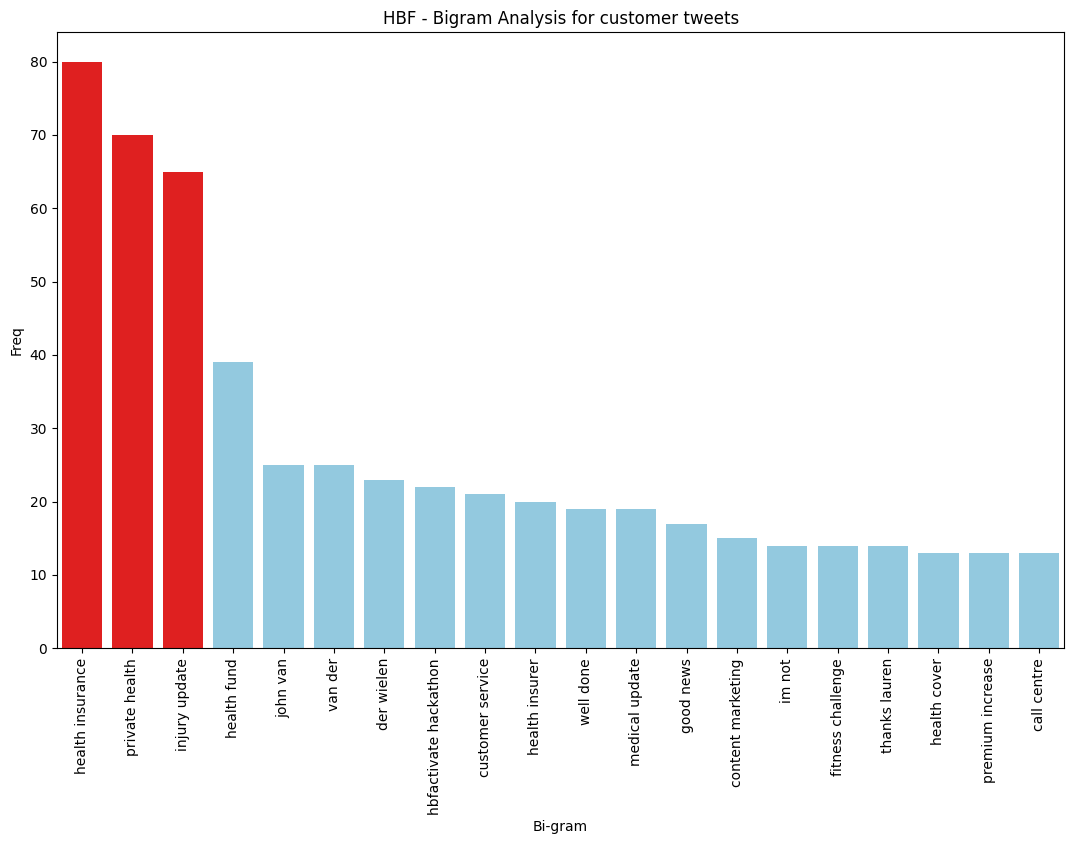

In [65]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

plt.figure(figsize=(13, 8))
palette_colors = ['red' if i < 3 else 'skyblue' for i in range(top_bigrams_to_show)]
h = sns.barplot(x="Bi-gram", y="Freq", data=bi_grams_hbf_cust_df[:top_bigrams_to_show], palette=palette_colors)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('HBF - Bigram Analysis for customer tweets')
plt.show()

In [66]:
tri_grams_hbf_cust_df = pd.DataFrame(tri_grams_hbf_cust)
tri_grams_hbf_cust_df.columns=["Tri-gram", "Freq"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-67-ada850be4fa8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h = sns.barplot(x="Tri-gram", y="Freq", data=tri_grams_hbf_cust_df[:top_bigrams_to_show], palette=palette_colors)
<ipython-input-67-ada850be4fa8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  h.set_xticklabels(h.get_xticklabels(), rotation=90)


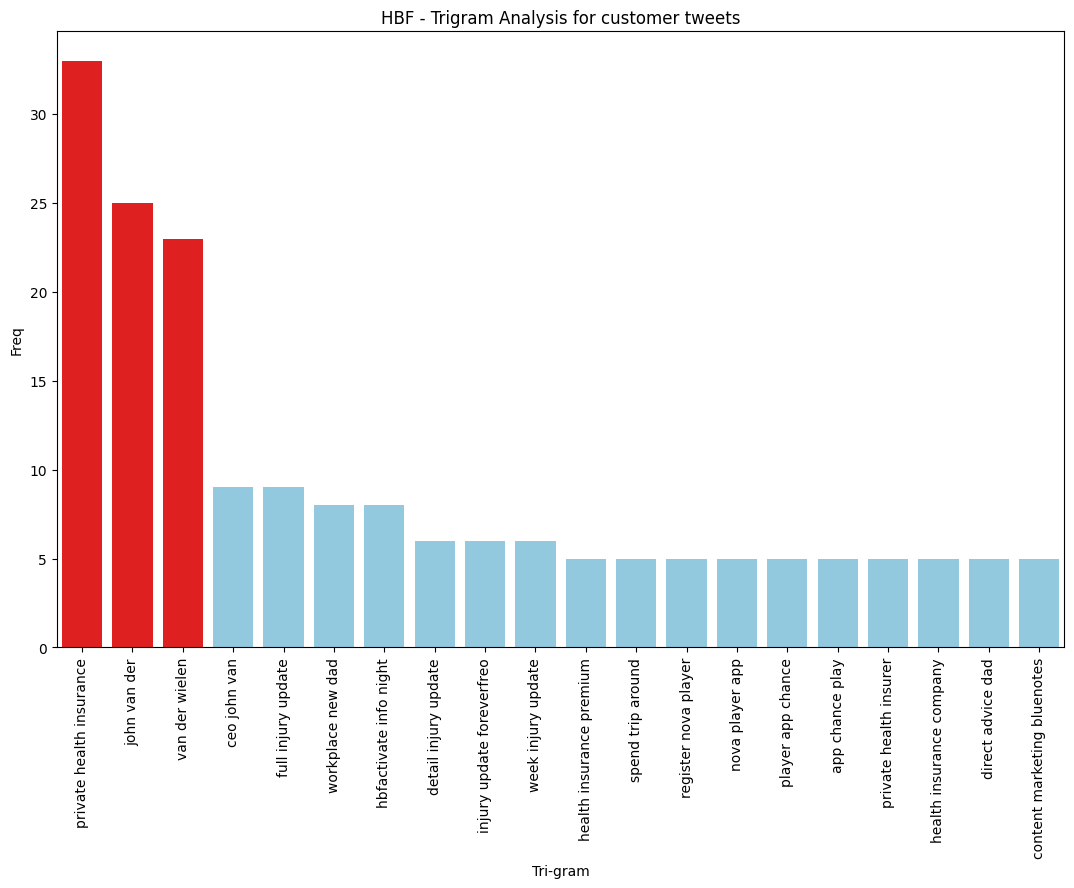

In [67]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

plt.figure(figsize=(13, 8))
palette_colors = ['red' if i < 3 else 'skyblue' for i in range(top_bigrams_to_show)]
h = sns.barplot(x="Tri-gram", y="Freq", data=tri_grams_hbf_cust_df[:top_bigrams_to_show], palette=palette_colors)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
plt.title('HBF - Trigram Analysis for customer tweets')
plt.show()

### Term Frequency - Inverse Document Frequecy (TF-IDF)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
tf_idf_hbf = vectorizer.fit_transform(df_hbf['tweet_lemmatized'])  # as the text data, we will use lemmatized sentences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
print(vectorizer.get_feature_names_out())

['000s' '0day' '10' ... 'zone' 'zucchini' 'zumba']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
print(df_hbf['tweet_lemmatized'].head())

0    thank great customer service bought new policy...
1                                                   ok
2                                                 nice
3    david thank reaching certainly understand conc...
4    cute ad adorable clever lyric lyric hbfhealth ...
Name: tweet_lemmatized, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
print(tf_idf_hbf[:5])

  (0, 6325)	0.3978095218900154
  (0, 6186)	0.3978095218900154
  (0, 6563)	0.38013827027126296
  (0, 3257)	0.18533541039045406
  (0, 3413)	0.1567358560475478
  (0, 2484)	0.19980060898932578
  (0, 2968)	0.23703830946918306
  (0, 6204)	0.20193860724434162
  (0, 5466)	0.18583732767347785
  (0, 1118)	0.3676003177154455
  (0, 7287)	0.2087788149506414
  (0, 2101)	0.24223975970949507
  (0, 3533)	0.1656064580763981
  (0, 8149)	0.20935227939613932
  (1, 5688)	1.0
  (2, 5493)	1.0
  (3, 3326)	0.33821876909531445
  (3, 722)	0.23913057829467915
  (3, 8073)	0.1692844162529532
  (3, 1871)	0.18873358390389036
  (3, 6174)	0.15645819147010068
  (3, 6293)	0.1694789264488386
  (3, 6720)	0.23787438656367801
  (3, 3829)	0.1403520952679234
  (3, 7237)	0.1512198170119505
  (3, 4824)	0.16559439389965835
  (3, 4846)	0.17189635574178963
  (3, 9041)	0.15916199335659145
  (3, 4136)	0.18589400812965015
  (3, 6618)	0.24936690053447721
  (3, 6671)	0.24771978015768445
  (3, 6753)	0.2589205279971701
  (3, 1807)	0.224534

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Temporal Analysis

In [73]:
# Convert 'date' column to datetime if it's not already in datetime format
df_hbf_comp['date'] = pd.to_datetime(df_hbf_comp['date'])
df_hbf_cust['date'] = pd.to_datetime(df_hbf_cust['date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-73-6d8de98f2aad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hbf_comp['date'] = pd.to_datetime(df_hbf_comp['date'])
<ipython-input-73-6d8de98f2aad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [74]:
df_hbf_cust['tweet_lemmatized'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2713

In [75]:
df_hbf_cust.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
0,2022-04-23,04:06:05,sintaprice,thank great customer service bought new policy...,en,thank great customer service bought new policy...
1,2022-04-22,13:18:55,dalegobbey1,ok,und,ok
2,2022-04-22,13:18:46,dalegobbey1,nice,en,nice
4,2022-04-21,01:39:36,michellesndz,cute ad adorable clever lyrics lyrics hbfhealt...,en,cute ad adorable clever lyric lyric hbfhealth ...
5,2022-04-20,17:01:48,davidel52539294,im pensioner health cover cost increased chang...,en,im pensioner health cover cost increased chang...


In [76]:
df_hbf_comp_daten_wise = df_hbf_comp.groupby(df_hbf_comp['date'])['tweet'].count().reset_index(name='tweet_count_comp')
df_hbf_cust_daten_wise = df_hbf_cust.groupby(df_hbf_cust['date'])['tweet'].count().reset_index(name='tweet_count_cust')

df_hbf_comp_month_wise = df_hbf_comp.groupby(df_hbf_comp['date'].dt.month)['tweet'].count().reset_index(name='tweet_count_comp')
df_hbf_cust_month_wise = df_hbf_cust.groupby(df_hbf_cust['date'].dt.month)['tweet'].count().reset_index(name='tweet_count_cust')

df_hbf_comp_year_wise = df_hbf_comp.groupby(df_hbf_comp['date'].dt.year)['tweet'].count().reset_index(name='tweet_count_comp')
df_hbf_cust_year_wise = df_hbf_cust.groupby(df_hbf_cust['date'].dt.year)['tweet'].count().reset_index(name='tweet_count_cust')

df_hbf_comp_date_wise = df_hbf_comp.groupby(df_hbf_comp['date'].dt.day_name())['tweet'].count().reset_index(name='tweet_count_comp')
df_hbf_cust_date_wise = df_hbf_cust.groupby(df_hbf_cust['date'].dt.day_name())['tweet'].count().reset_index(name='tweet_count_cust')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Tamporal Analysis by year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


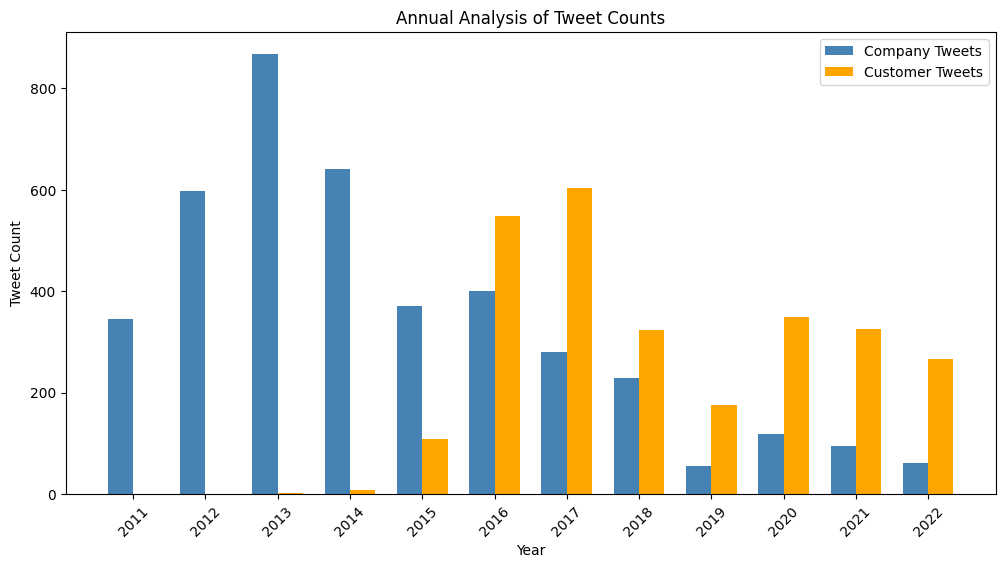

In [77]:
years = sorted(set(df_hbf_comp_year_wise['date']).union(set(df_hbf_cust_year_wise['date'])))

# Initialize tweet counts for Company and Customer
tweet_counts_comp = []
tweet_counts_cust = []

# Retrieve tweet counts for Company and Customer for each year
for year in years:
    tweet_counts_comp.append(df_hbf_comp_year_wise[df_hbf_comp_year_wise['date'] == year]['tweet_count_comp'].values[0] if year in df_hbf_comp_year_wise['date'].values else 0)
    tweet_counts_cust.append(df_hbf_cust_year_wise[df_hbf_cust_year_wise['date'] == year]['tweet_count_cust'].values[0] if year in df_hbf_cust_year_wise['date'].values else 0)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Define the width of each bar and bar positions
bar_width = 0.35
r1 = np.arange(len(years))  # Bar positions for Company Tweets
r2 = [x + bar_width for x in r1]  # Bar positions for Customer Tweets

# Plotting grouped bars for Company Tweets (blue color)
plt.bar(r1, tweet_counts_comp, color='steelblue', width=bar_width, label='Company Tweets')

# Plotting grouped bars for Customer Tweets (orange color)
plt.bar(r2, tweet_counts_cust, color='orange', width=bar_width, label='Customer Tweets')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.title('Annual Analysis of Tweet Counts')
plt.xticks([r + bar_width / 2 for r in range(len(years))], years)  # Set x-ticks in the middle of grouped bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)  # Add gridlines to the plot
plt.legend()  # Display legend with labels

# Show plot
plt.show()

In [78]:
new_df = df_hbf_comp.loc[df_hbf_comp['date'] < '2015-12-31']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
new_df_tri = get_ngrams(new_df['tweet_lemmatized'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
new_df_tri

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('free health check', 27),
 ('win sport fever', 22),
 ('branch free health', 22),
 ('record result pocket', 22),
 ('result pocket health', 22),
 ('health check member', 20),
 ('tristan amp lauren', 20),
 ('sport fever voucher', 20),
 ('kind regard steph', 18),
 ('rottnest channel swim', 17),
 ('member record result', 17),
 ('lauren amp tristan', 16),
 ('address well get', 14),
 ('go draw win', 14),
 ('check member record', 14),
 ('please member number', 13),
 ('sorry hear please', 11),
 ('best time call', 11),
 ('keep posted progress', 11),
 ('dr duncan jefferson', 11),
 ('member number look', 10),
 ('make sure get', 9),
 ('win great prize', 9),
 ('thanks spreading word', 9),
 ('would like discus', 8),
 ('please email socialcomau', 8),
 ('well back tomorrow', 8),
 ('outdoor fitness session', 8),
 ('call visit branch', 8),
 ('tell ur ny', 8),
 ('tristan amp kiera', 7),
 ('contact best time', 7),
 ('free training session', 7),
 ('week hbfwellness challenge', 7),
 ('visit branch see', 7)

In [81]:
new_df_2 = df_hbf_cust.loc[df_hbf_cust['date'] > '2015-12-31']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
new_df2_tri = get_ngrams(new_df_2['tweet_lemmatized'].tolist(), ngram_range=(3, 3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
new_df2_tri

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('private health insurance', 33),
 ('john van der', 25),
 ('van der wielen', 23),
 ('ceo john van', 9),
 ('full injury update', 9),
 ('workplace new dad', 8),
 ('hbfactivate info night', 8),
 ('detail injury update', 6),
 ('injury update foreverfreo', 6),
 ('week injury update', 6),
 ('health insurance premium', 5),
 ('spend trip around', 5),
 ('register nova player', 5),
 ('nova player app', 5),
 ('player app chance', 5),
 ('app chance play', 5),
 ('private health insurer', 5),
 ('health insurance company', 5),
 ('direct advice dad', 5),
 ('content marketing bluenotes', 5),
 ('fiona stanley hospital', 5),
 ('private health cover', 4),
 ('bos john van', 4),
 ('aussie band win', 4),
 ('band win spend', 4),
 ('win spend trip', 4),
 ('trip around australia', 4),
 ('around australia register', 4),
 ('australia register nova', 4),
 ('correctly guess aussie', 4),
 ('guess aussie band', 4),
 ('der wielen ceo', 4),
 ('halt advertising facebook', 4),
 ('best workplace new', 4),
 ('live novasre

##Temporal Analysis by month


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


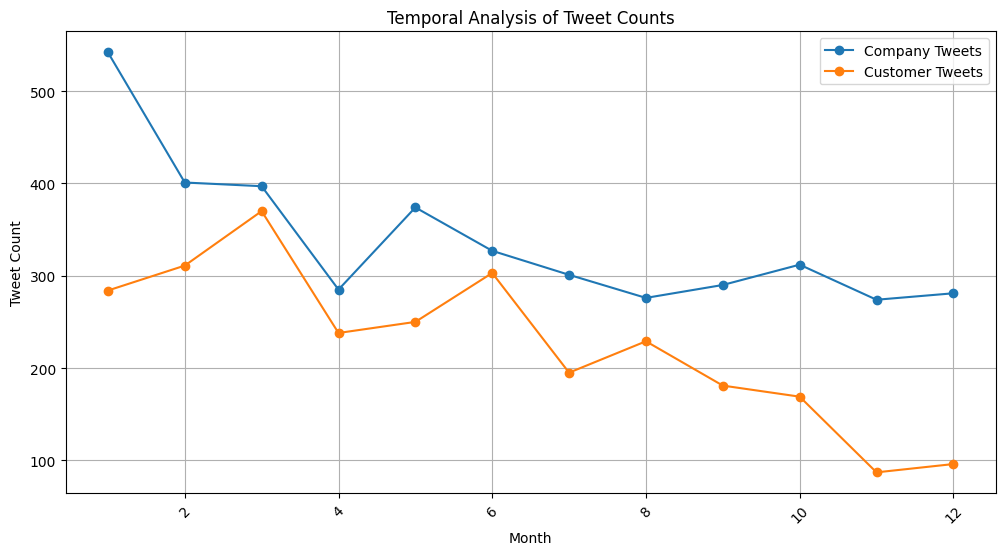

In [84]:
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)

# Plotting line chart for Company tweets
plt.plot(df_hbf_comp_month_wise['date'], df_hbf_comp_month_wise['tweet_count_comp'], label='Company Tweets', marker='o')

# Plotting line chart for Customer tweets
plt.plot(df_hbf_cust_month_wise['date'], df_hbf_cust_month_wise['tweet_count_cust'], label='Customer Tweets', marker='o')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Temporal Analysis of Tweet Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines to the plot
plt.legend()  # Display legend with labels

# Show plot
plt.show()

##Temporal Analysis by day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


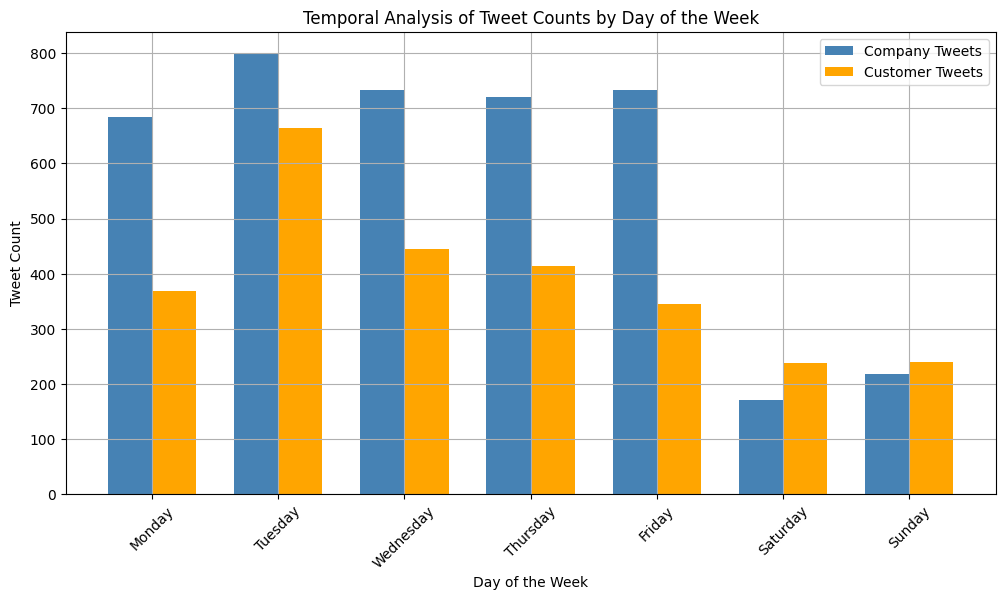

In [85]:
# Define the custom order of days of the week
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'date' column to categorical with custom order
df_hbf_comp_date_wise['date'] = pd.Categorical(df_hbf_comp_date_wise['date'], categories=weekdays_order, ordered=True)
df_hbf_cust_date_wise['date'] = pd.Categorical(df_hbf_cust_date_wise['date'], categories=weekdays_order, ordered=True)

# Sort DataFrame by day of the week
df_hbf_comp_date_wise = df_hbf_comp_date_wise.sort_values('date')
df_hbf_cust_date_wise = df_hbf_cust_date_wise.sort_values('date')

# Set the figure size (width, height)
plt.figure(figsize=(12, 6))

# Define the width of each bar and bar positions
bar_width = 0.35
r1 = np.arange(len(df_hbf_comp_date_wise))  # Bar positions for Company Tweets
r2 = [x + bar_width for x in r1]  # Bar positions for Customer Tweets

# Plotting grouped bars for Company Tweets
plt.bar(r1, df_hbf_comp_date_wise['tweet_count_comp'], color='steelblue', width=bar_width, label='Company Tweets')

# Plotting grouped bars for Customer Tweets
plt.bar(r2, df_hbf_cust_date_wise['tweet_count_cust'], color='orange', width=bar_width, label='Customer Tweets')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Count')
plt.title('Temporal Analysis of Tweet Counts by Day of the Week')
plt.xticks([r + bar_width / 2 for r in range(len(df_hbf_comp_date_wise))], df_hbf_comp_date_wise['date'])  # Set x-ticks in the middle of grouped bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines to the plot
plt.legend()  # Display legend with labels

# Show plot
plt.show()

##Temporal Analysis by date

In [86]:
df_hbf_comp_daten_wise.sort_values(by="tweet_count_comp",ascending =False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tweet_count_comp
1218,2017-02-10,20
621,2014-01-03,17
473,2013-05-26,16
623,2014-01-06,16
834,2015-01-02,15
...,...,...
1110,2016-06-30,1
100,2011-09-21,1
1113,2016-07-07,1
1114,2016-07-08,1


In [87]:
df_hbf_comp.loc[df_hbf_comp['date'] == '2017-02-10']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
2888,2017-02-10,09:54:25,hbfhealth,im sorry hear youve cancelled cover great talk...,en,im sorry hear youve cancelled cover great talk...
2889,2017-02-10,09:53:11,hbfhealth,hi christine notfor profit fund work hard keep...,en,christine notfor profit fund work hard keep pr...
2891,2017-02-10,07:57:52,hbfhealth,hi ray sounds really unusual definitely someth...,en,ray sound really unusual definitely something ...
2892,2017-02-10,06:37:13,hbfhealth,great well need confirm member number cover se...,en,great well need confirm member number cover se...
2893,2017-02-10,06:31:14,hbfhealth,hi gregory definitely understand still good re...,en,gregory definitely understand still good revie...
2894,2017-02-10,06:30:34,hbfhealth,know wait times moment arent ideal amp trying ...,en,know wait time moment arent ideal amp trying r...
2898,2017-02-10,05:08:21,hbfhealth,hi margaret good hear youve contact us qs quot...,en,margaret good hear youve contact q quote send ...
2900,2017-02-10,04:19:34,hbfhealth,send us dm chat see else replied fb post lauren,en,send chat see else replied fb post lauren
2901,2017-02-10,04:17:04,hbfhealth,hi diane benefits arent lowering increased avg...,en,diane benefit arent lowering increased avg last
2902,2017-02-10,03:58:55,hbfhealth,hi gregory sounds really unusual send us dm am...,en,gregory sound really unusual send amp look amp...


In [88]:
df_hbf_cust_daten_wise.sort_values(by="tweet_count_cust",ascending =False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tweet_count_cust
711,2020-03-26,34
936,2022-01-31,30
935,2022-01-30,29
842,2021-06-16,29
14,2015-09-06,24
...,...,...
623,2019-08-02,1
622,2019-08-01,1
621,2019-07-23,1
620,2019-07-18,1


In [89]:
df_hbf_cust.loc[df_hbf_cust['date'] == '2020-03-26']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
1063,2020-03-26,23:16:51,shauncgath,inquiry,en,inquiry
1064,2020-03-26,22:55:38,terrybarnes5,value proposition need revamped cover regulato...,en,value proposition need revamped cover regulato...
1065,2020-03-26,22:49:00,shauncgath,whats point paying vast sums insure surgery th...,en,whats point paying vast sum insure surgery tha...
1066,2020-03-26,22:43:08,terrybarnes5,disagree last point yes mark fitzbibbon unwise...,en,disagree last point yes mark fitzbibbon unwise...
1067,2020-03-26,22:36:43,shauncgath,membership holds early signs theyre gonna make...,en,membership hold early sign theyre gonna make m...
1068,2020-03-26,22:32:51,terrybarnes5,advising id urging nil premium rises approved ...,en,advising id urging nil premium rise approved b...
1069,2020-03-26,22:31:40,wahawkchick,adele thieves insurance companies part rc banks,en,adele thief insurance company part rc bank
1070,2020-03-26,22:24:35,johnfor23089656,adele hfc going,en,adele hfc going
1071,2020-03-26,22:23:31,shauncgath,bearing mind lowest increase therefore easiest...,en,bearing mind lowest increase therefore easiest...
1072,2020-03-26,21:49:38,wahawkchick,adele disgusting isnt way anyone keeping cover...,en,adele disgusting isnt way anyone keeping cover...


In [90]:
df_hbf_count = df_hbf.groupby(df_hbf['date'])['tweet'].count().reset_index(name='tweet_count_cust')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
df_hbf_count.sort_values(by="tweet_count_cust",ascending =False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tweet_count_cust
1892,2020-03-26,38
1315,2017-02-10,35
2038,2021-06-16,31
2142,2022-01-31,30
970,2015-09-06,29
...,...,...
1126,2016-05-15,1
1132,2016-05-21,1
1136,2016-05-25,1
1140,2016-05-29,1


In [92]:
df_hbf.loc[df_hbf['date'] == '2020-03-26']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized
1062,2020-03-26,23:20:09,hbfhealth,hi gav cancelled premium increase sent letter ...,en,gav cancelled premium increase sent letter say...
1063,2020-03-26,23:16:51,shauncgath,inquiry,en,inquiry
1064,2020-03-26,22:55:38,terrybarnes5,value proposition need revamped cover regulato...,en,value proposition need revamped cover regulato...
1065,2020-03-26,22:49:00,shauncgath,whats point paying vast sums insure surgery th...,en,whats point paying vast sum insure surgery tha...
1066,2020-03-26,22:43:08,terrybarnes5,disagree last point yes mark fitzbibbon unwise...,en,disagree last point yes mark fitzbibbon unwise...
1067,2020-03-26,22:36:43,shauncgath,membership holds early signs theyre gonna make...,en,membership hold early sign theyre gonna make m...
1068,2020-03-26,22:32:51,terrybarnes5,advising id urging nil premium rises approved ...,en,advising id urging nil premium rise approved b...
1069,2020-03-26,22:31:40,wahawkchick,adele thieves insurance companies part rc banks,en,adele thief insurance company part rc bank
1070,2020-03-26,22:24:35,johnfor23089656,adele hfc going,en,adele hfc going
1071,2020-03-26,22:23:31,shauncgath,bearing mind lowest increase therefore easiest...,en,bearing mind lowest increase therefore easiest...


# Sentiment Analysis

In [93]:
from textblob import TextBlob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
df_hbf['sentiment'] = df_hbf['tweet_lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
df_hbf[['tweet_lemmatized', 'sentiment']].head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet_lemmatized,sentiment
0,thank great customer service bought new policy...,0.445455
1,ok,0.500000
2,nice,0.600000
3,david thank reaching certainly understand conc...,0.238095
4,cute ad adorable clever lyric lyric hbfhealth ...,0.333333
5,im pensioner health cover cost increased chang...,-0.110417
6,seems get one limit cover service use need nee...,0.000000
7,iwish stretch dollar far,0.100000
8,le expected flexible cover,-0.100000
9,,0.000000


In [96]:
average_sentiment = df_hbf['sentiment'].mean()

print(f"Average Sentiment: {average_sentiment:.2f}")

Average Sentiment: 0.16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
mean_sentiment_by_date = df_hbf.groupby(['date'])['sentiment'].mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
mean_sentiment_by_date_sorted = mean_sentiment_by_date.sort_values(ascending=False)
mean_sentiment_by_date_sorted

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date
2019-02-04    1.000000
2012-07-18    1.000000
2016-03-01    1.000000
2020-10-09    1.000000
2020-09-01    1.000000
                ...   
2020-10-25   -0.714286
2020-06-30   -0.800000
2020-09-26   -0.800000
2020-06-27   -0.800000
2020-06-29   -0.800000
Name: sentiment, Length: 2201, dtype: float64

In [99]:
df_hbf.loc[df_hbf['date'] == '2019-02-04']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized,sentiment
1485,2019-02-04,09:44:06,nutritionperth,iq talking hbffitnessvicpark nutrition iq way ...,en,iq talking hbffitnessvicpark nutrition iq way ...,1.0


In [100]:
df_hbf['date'] = pd.to_datetime(df_hbf['date']) #converting date column to date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
mean_sentiment = df_hbf.groupby(df_hbf['date'].dt.year)['sentiment'].mean().reset_index(name='mean_sentiment')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
mean_sentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,mean_sentiment
0,2011,0.162689
1,2012,0.217763
2,2013,0.238819
3,2014,0.288071
4,2015,0.188095
5,2016,0.148455
6,2017,0.102665
7,2018,0.133513
8,2019,0.129333
9,2020,0.098830


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


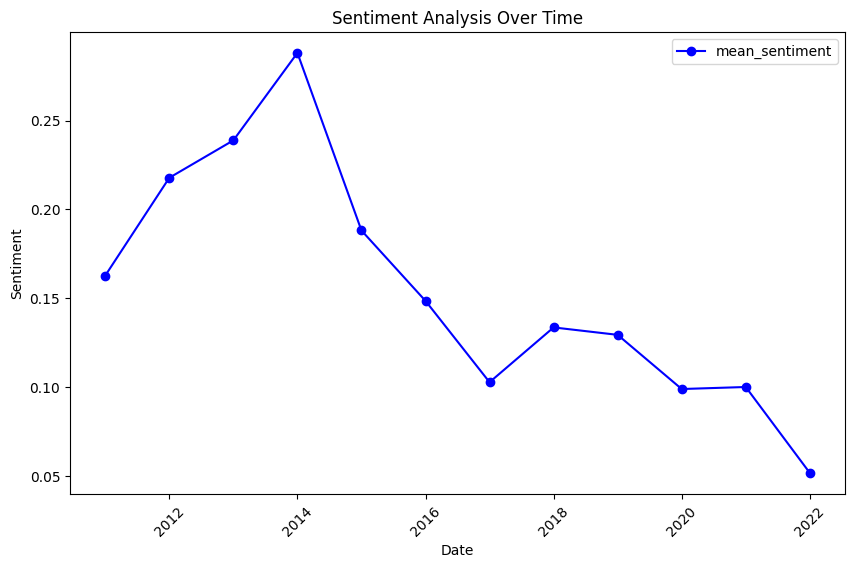

In [103]:
# Plot line chart of sentiment as a function of date
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.plot(mean_sentiment['date'], mean_sentiment['mean_sentiment'], marker='o', linestyle='-', color='b', label='mean_sentiment')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)  # Add gridlines to the plot
plt.legend()  # Display legend with labels

# Show plot
plt.show()

In [104]:
df_hbf.loc[(df_hbf['date'] > '2014-01-01') & (df_hbf['date'] < '2014-12-31')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized,sentiment
4447,2014-12-30,05:32:00,hbfhealth,hbf members tell us youre makinghealthyhappen ...,en,member tell youre makinghealthyhappen well see...,0.000000
4448,2014-12-30,03:00:06,hbfhealth,start makinghealthyhappen making excuses,en,start makinghealthyhappen making excuse,-0.050000
4449,2014-12-30,02:52:09,hbfhealth,impressive hbf mbrs get disc online entry mara...,en,impressive mbrs get disc online entry marathon...,1.000000
4450,2014-12-29,08:27:31,hbfhealth,hi russell theres discount paying yearly not c...,en,russell there discount paying yearly not cheap...,0.000000
4451,2014-12-29,03:00:08,hbfhealth,goals tell us youre makinghealthyhappen amp we...,en,goal tell youre makinghealthyhappen amp well s...,0.000000
...,...,...,...,...,...,...,...
5091,2014-01-02,05:56:38,hbfhealth,great well case please dm us best address send...,en,great well case please best address send well ...,0.900000
5092,2014-01-02,05:45:28,hbfhealth,slow steady wins race great way start howd lik...,en,slow steady win race great way start howd like...,0.293333
5093,2014-01-02,04:29:45,hbfhealth,getting excited impressive goal keep us posted...,en,getting excited impressive goal keep posted pr...,0.543750
5094,2014-01-02,04:02:17,hbfhealth,great see youve set realistic fitness goals we...,en,great see youve set realistic fitness goal wed...,0.488889


In [105]:
df_hbf_cust_sen = df_hbf.loc[df_hbf['username'] != 'hbfhealth']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
mean_sentiment_cus = df_hbf_cust_sen.groupby(df_hbf_cust_sen['date'].dt.year)['sentiment'].mean().reset_index(name='mean_sentiment')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


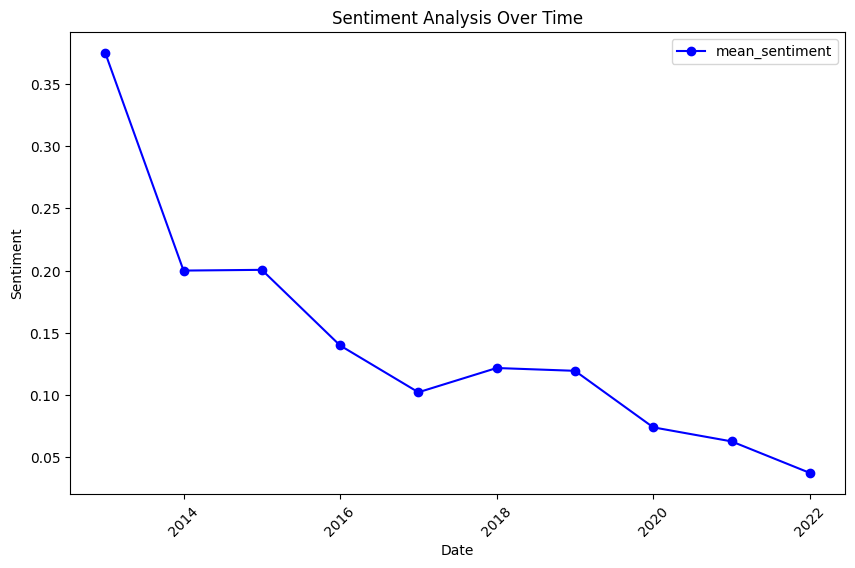

In [107]:
# Plot line chart of sentiment as a function of date
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.plot(mean_sentiment_cus['date'], mean_sentiment_cus['mean_sentiment'], marker='o', linestyle='-', color='b', label='mean_sentiment')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)  # Add gridlines to the plot
plt.legend()  # Display legend with labels

# Show plot
plt.show()

In [108]:
mean_sentiment_cus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,mean_sentiment
0,2013,0.375000
1,2014,0.200000
2,2015,0.200592
3,2016,0.139782
4,2017,0.102161
5,2018,0.121671
6,2019,0.119408
7,2020,0.073975
8,2021,0.062684
9,2022,0.037348


In [109]:
sent_2015 = df_hbf_cust_sen.loc[(df_hbf_cust_sen['date'] > "2015-01-01") & (df_hbf_cust_sen['date'] < "2015-12-31")]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
sent_2015 = sent_2015.sort_values(by='sentiment', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
sent_2015.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,time,username,tweet,language,tweet_lemmatized,sentiment
4120,2015-09-06,02:47:15,muzza_05,best west,en,best west,1.00
4113,2015-09-06,03:33:32,zimblondie,best west,en,best west,1.00
4098,2015-09-07,00:06:46,trevaskislj,may look delicious still fighters let warning ...,en,may look delicious still fighter let warning b...,1.00
4033,2015-10-08,22:24:54,ipfprogram,makinghealthyhappen hubby 5km every sat mornin...,en,makinghealthyhappen hubby 5km every sat mornin...,0.85
4088,2015-09-09,03:42:54,paulmore73,west time fly dont let chance pass,en,west time fly dont let chance pas,0.80
4010,2015-10-26,09:17:27,marketingeyeaus,congratulations team also sitting table winner...,en,congratulation team also sitting table winner ...,0.80
4117,2015-09-06,03:04:21,giovannitorre,australia welcomes refugees syria id like see ...,en,australia welcome refugee syria id like see ba...,0.80
4094,2015-09-07,08:00:09,this_is_zoe,passion courage amp luck win premiership cup,en,passion courage amp luck win premiership cup,0.80
3960,2015-12-23,13:09:05,eggbuckland,great pic,en,great pic,0.80
4073,2015-09-18,04:38:44,idontclaire,great deal saved heap,en,great deal saved heap,0.80


# Topic Modeling

In [112]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# Convert the tweets as the text corpus.
corpus = list(df_hbf_cust['tweet_lemmatized'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
corpus[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['thank great customer service bought new policy family dont get free quoka plushy prettyplease',
 'ok',
 'nice',
 'cute ad adorable clever lyric lyric hbfhealth hpf cuteads animated tvadvertising',
 'im pensioner health cover cost increased change cover gave rebate last take back average increase around health fund holding question elderly hit hard']

In [115]:
hbf_texts = [[word for word in str(document).split()] for document in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
hbf_texts[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['thank',
  'great',
  'customer',
  'service',
  'bought',
  'new',
  'policy',
  'family',
  'dont',
  'get',
  'free',
  'quoka',
  'plushy',
  'prettyplease'],
 ['ok'],
 ['nice'],
 ['cute',
  'ad',
  'adorable',
  'clever',
  'lyric',
  'lyric',
  'hbfhealth',
  'hpf',
  'cuteads',
  'animated',
  'tvadvertising'],
 ['im',
  'pensioner',
  'health',
  'cover',
  'cost',
  'increased',
  'change',
  'cover',
  'gave',
  'rebate',
  'last',
  'take',
  'back',
  'average',
  'increase',
  'around',
  'health',
  'fund',
  'holding',
  'question',
  'elderly',
  'hit',
  'hard']]

In [117]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(hbf_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'hbf.dict'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
print(hbf_texts[0])
print('alphabetically sorted', sorted(hbf_texts[0]))

['thank', 'great', 'customer', 'service', 'bought', 'new', 'policy', 'family', 'dont', 'get', 'free', 'quoka', 'plushy', 'prettyplease']
alphabetically sorted ['bought', 'customer', 'dont', 'family', 'free', 'get', 'great', 'new', 'plushy', 'policy', 'prettyplease', 'quoka', 'service', 'thank']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
print(hbf_texts[1])
print('alphabetically sorted', sorted(hbf_texts[1]))

['ok']
alphabetically sorted ['ok']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
# Print the dictionary
print(dictionary.token2id)

{'bought': 0, 'customer': 1, 'dont': 2, 'family': 3, 'free': 4, 'get': 5, 'great': 6, 'new': 7, 'plushy': 8, 'policy': 9, 'prettyplease': 10, 'quoka': 11, 'service': 12, 'thank': 13, 'ok': 14, 'nice': 15, 'ad': 16, 'adorable': 17, 'animated': 18, 'clever': 19, 'cute': 20, 'cuteads': 21, 'hbfhealth': 22, 'hpf': 23, 'lyric': 24, 'tvadvertising': 25, 'around': 26, 'average': 27, 'back': 28, 'change': 29, 'cost': 30, 'cover': 31, 'elderly': 32, 'fund': 33, 'gave': 34, 'hard': 35, 'health': 36, 'hit': 37, 'holding': 38, 'im': 39, 'increase': 40, 'increased': 41, 'last': 42, 'pensioner': 43, 'question': 44, 'rebate': 45, 'take': 46, 'dental': 47, 'instead': 48, 'le': 49, 'left': 50, 'limit': 51, 'need': 52, 'one': 53, 'physio': 54, 'seems': 55, 'separate': 56, 'use': 57, 'dollar': 58, 'far': 59, 'iwish': 60, 'stretch': 61, 'expected': 62, 'flexible': 63, 'avax': 64, 'link': 65, 'mina': 66, 'token': 67, 'love': 68, 'actually': 69, 'claremont': 70, 'game': 71, 'guilty': 72, 'haha': 73, 'listen

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in hbf_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
tweet_id = 0
print(hbf_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(hbf_texts[tweet_id])) # each token is represented as a id from a dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['thank', 'great', 'customer', 'service', 'bought', 'new', 'policy', 'family', 'dont', 'get', 'free', 'quoka', 'plushy', 'prettyplease']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


##Generating the topic model

In [123]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
total_topics = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.021*"amp" + 0.017*"get" + 0.015*"accelerator" + 0.015*"update" + 0.013*"injury" + 0.008*"hbfhealth"'),
 (1,
  '0.012*"update" + 0.011*"get" + 0.010*"medical" + 0.010*"amp" + 0.009*"would" + 0.008*"gt"'),
 (2,
  '0.018*"thanks" + 0.011*"done" + 0.011*"rt" + 0.010*"hbfhealth" + 0.008*"great" + 0.008*"perth"'),
 (3,
  '0.013*"health" + 0.012*"thanks" + 0.009*"great" + 0.009*"not" + 0.009*"amp" + 0.008*"perth"'),
 (4,
  '0.019*"health" + 0.018*"not" + 0.012*"insurance" + 0.010*"get" + 0.009*"dont" + 0.008*"like"'),
 (5,
  '0.016*"update" + 0.015*"get" + 0.013*"health" + 0.010*"cant" + 0.009*"injury" + 0.008*"pay"'),
 (6,
  '0.023*"health" + 0.009*"great" + 0.009*"night" + 0.008*"amp" + 0.008*"awesome" + 0.007*"info"'),
 (7,
  '0.011*"week" + 0.009*"got" + 0.009*"love" + 0.008*"not" + 0.008*"still" + 0.007*"get"'),
 (8,
  '0.016*"health" + 0.014*"amp" + 0.009*"beautiful" + 0.009*"want" + 0.007*"kid" + 0.007*"fund"'),
 (9,
  '0.014*"good" + 0.008*"luck" + 0.008*"cover" + 0.007*"ful

## Interactive topic analyzer

In [128]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      23.311823 -79.664330       1        1  16.644556
0     -16.171766 -36.397453       2        1  16.233541
1      73.863228 -37.277214       3        1  13.828103
3     -52.212696 -79.818161       4        1  11.789260
5     -77.521759 -14.348475       5        1  10.197366
4      27.971565  -2.716962       6        1   9.803209
6      67.613342  38.566235       7        1   6.189468
2     -23.247452  18.626743       8        1   5.117034
8       8.423721  68.788536       9        1   5.098821
9     -65.498062  55.921371      10        1   5.098642, topic_info=             Term       Freq      Total Category  logprob  loglift
4989  accelerator   6.000000   6.000000  Default  30.0000  30.0000
36         health  26.000000  26.000000  Default  29.0000  29.0000
482        thanks  16.000000  16.000000  Default  28.0000  28.0000
81            amp  23.000000  23.000000  Default  27.0000  27.0000
1862       update  19.000000  19.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
153       private   0.497372   5.714672  Topic10  -5.6280   0.5347
350           see   0.504841   7.757008  Topic10  -5.6131   0.2441
754          give   0.464241   3.034655  Topic10  -5.6970   1.0987
53            one   0.486967  10.410126  Topic10  -5.6492  -0.0861
160        member   0.479067  10.385983  Topic10  -5.6655  -0.1002

[717 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1650      4  1.645562         17th
2921      3  0.952303          1st
1568      4  0.348812         able
1568      6  0.348812         able
4989      2  1.036444  accelerator
...     ...       ...          ...
4526      3  1.207648        write
166       1  0.413610          yes
166      10  0.413610          yes
80        5  0.637319    yesterday
4382      7  0.652849         yoga

[667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 2, 4, 6, 5, 7, 3, 9, 10])